## Criando o Modelo

In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout, SpatialDropout2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import to_categorical
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

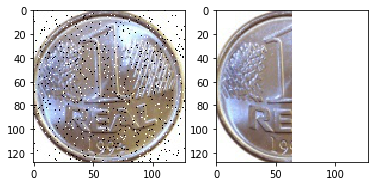

In [11]:
imgsp = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Salt_pepper\\2_1.jpg')
imghalf = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Metade\\2_1.jpg')
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(imgsp, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(imghalf, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
entrada = Input(shape=(img.shape))
conv1 = Conv2D(32, 3, activation='relu')(entrada)
max1 = MaxPooling2D()(conv1)
conv_drop1 = SpatialDropout2D(0.025)(max1)
conv2 = Conv2D(64, 3, activation='relu')(conv_drop1)
max2 = MaxPooling2D()(conv2)
conv_drop2 = SpatialDropout2D(0.05)(max2)
conv3 = Conv2D(128, 3, activation='relu')(conv_drop2)
max3 = MaxPooling2D()(conv3)
conv_drop3 = SpatialDropout2D(0.1)(max3)
flatten = Flatten()(conv_drop3)
densa1 = Dense(512, activation='relu')(flatten)
densa_drop1 = Dropout(0.1)(densa1)
densa2 = Dense(512, activation='relu')(densa_drop1)
densa_drop2 = Dropout(0.1)(densa2)
saida = Dense(18, activation='softmax')(densa_drop2)
model = Model(entrada, saida)

W1013 21:34:06.700709  8112 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1013 21:34:07.143814  8112 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1013 21:34:07.261845  8112 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1013 21:34:07.383881  8112 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1013 21:34:07.436899  8112 deprecation

In [5]:
model.load_weights("coinnet_epoch_33.hdf5")

W1013 21:34:09.216335  8112 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



## Classificando moedas dos Datasets danificados

In [8]:
x_test_sandp = []
x_test_metade = []
y_sandp = []
y_metade = []
for files in os.listdir('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Salt_pepper'):
    img = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Salt_pepper\\' + files,1)
    x_test_sandp.append(img)
    img_nome = files.split("_")
    y_sandp.append(img_nome[0])
    
for files in os.listdir('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Metade'):
    img = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Metade\\' + files,1)
    x_test_metade.append(img)
    img_nome = files.split("_")
    y_metade.append(img_nome[0])

x_test_sandp = np.array(x_test_sandp)
x_test_metade = np.array(x_test_metade)
y_sandp = np.array(y_sandp)
y_metade = np.array(y_metade)

In [9]:
predicoes_sandp = model.predict(x_test_sandp)
predicoes_metade = model.predict(x_test_metade)

In [10]:
y_sandp = to_categorical(y_sandp)
y_metade = to_categorical(y_metade)

In [11]:
matriz_sandp = confusion_matrix(np.argmax(y_sandp, axis = 1), np.argmax(predicoes_sandp, axis=1))
matriz_metade = confusion_matrix(np.argmax(y_metade, axis = 1), np.argmax(predicoes_metade, axis=1))

In [18]:
print(matriz_sandp)
print(classification_report(np.argmax(y_sandp, axis = 1), np.argmax(predicoes_sandp,axis = 1)))

[[190   0 157   0   0   0   0   3   0   0   0   0   0   0   0   7   1]
 [  0 165   0   0   0   0   0   0   0   0   0   0  82   0 111   0   0]
 [  0   0 343   0   0   0   0   0   0   0   0   0   0   0   0  15   0]
 [  0 111   0  13   0   0   0   0   0   0   0   0  39   0  55 132   8]
 [  0   0   0   0 343   0  15   0   0   0   0   0   0   0   0   0   0]
 [  0   6   0   0   0   0   0   0   1   0   0   0 291   0  60   0   0]
 [  0   0   0   0   0   0 358   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 358   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   2   0   0   0 194   0 160   0   0]
 [  0   0   0   0   0   0   0   1   0 357   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0  39   0 169   0  41  51   1]
 [  0   0   0   0   1   0   5 329   0   3   0  16   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 357   0   1   0   0]
 [  0   0   0   0   0   0  10   2   0 266   0   0   0  80   0   0   0]
 [  0 

C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
print(matriz_metade)
print(classification_report(np.argmax(y_metade, axis = 1), np.argmax(predicoes_metade,axis = 1)))

[[ 84   0  18   0   0   0   0   0   0   0   0   0   0   0   0 256   0]
 [  0 280   0   2   0   0   0   0   0   0  49   0   0   0   0  27   0]
 [  0   0  15   0   0   0   0   0   0   0   0   0   0   0   0 343   0]
 [  0   2   0 213   0   0   0   0   0   0  71   0   0   0   0  72   0]
 [  0   0   0   0  28   0   0  13   0  19   0   0 230   0   7  49  12]
 [  0  27   0  49   0   0   0   0   0   0 147   0  54   0   0  45  36]
 [  0   0   0   0   0   0  20  50   0  56   0   0 199   0  12  16   5]
 [  0   0   0   0   0   0   0 128   0   1   0   0  10   0   0 206  13]
 [  0 100   0  24   0   0   0   0   0   0  81   0  68   0   0  41  44]
 [  0   0   0   0   0   0   0  66   0 157   0   0  90   0   0  45   0]
 [  0   1   0   0   0   0   0   0   0   0 354   0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 236 122]
 [  0  26   0   0   0   0   0   0   0   0   3   0 272   0   0  57   0]
 [  0   0   0   0   0   0   0 101   0  96   0   0   6   4   0 151   0]
 [  0 